In [1]:
#Lead Actor Analysis

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('transcripts_friends/friends-dataset.csv', index_col=0)
df.head()

,Location,Scene,Season,Speaker,Text
0,Chandler and Joey's,Joey is repacking the furniture into boxes to...,4,Joey,What?
1,Monica and Rachel's,"the next morning, Monica is getting the door,",1,Monica,"Oh, you got the whole night, huh?"
2,Mike's apartment,His phone rings and he picks up,9,Chandler,"Phoebe is going to say ""yes""? That's, that's g..."
3,Monica and Rachel's,Ross and Monica are sitting on the couch play...,4,Ross,Yeah.
4,Phoebe’s birthday,she’s telling everyone what she found out at ...,7,Phoebe,Oh!


In [4]:
count = df['Speaker'].value_counts()
print(count)

Rachel      17058
Ross        16672
Chandler    15389
Monica      15353
Joey        15235
Phoebe      13628
Name: Speaker, dtype: int64


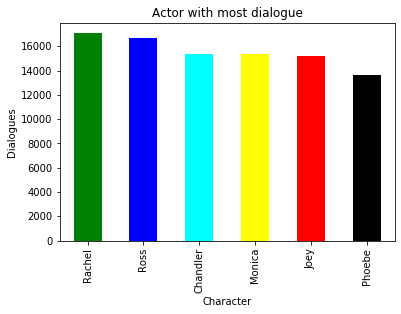

In [7]:
import matplotlib.pyplot as plt
count.plot.bar(color=['green', 'blue', 'cyan', 'yellow', 'red', 'black'])
plt.title("Actor with most dialogue")
plt.ylabel('Dialogues')
plt.xlabel('Character')
plt.show()


In [27]:
#Top Location  in the Series

n=6
count_location = df['Location'].value_counts()[:n]
print(count_location)

 Central Perk             16805
 Monica and Rachel's      15722
 Monica and Chandler's     5314
 Chandler and Joey's       3837
 Joey and Rachel's         3024
 Monica                    2558
Name: Location, dtype: int64


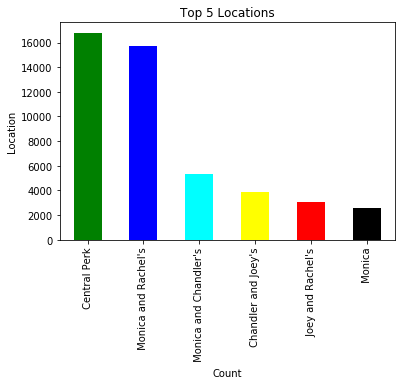

In [28]:
import matplotlib.pyplot as plt
count_location.plot.bar(color=['green', 'blue', 'cyan', 'yellow', 'red', 'black'])
plt.title("Top 5 Locations")
plt.ylabel('Location')
plt.xlabel('Count')
plt.show()

In [ ]:
#--------------------------------------------------------------------------------------------------------------

In [8]:
#Friends Mentions Link Analysis

In [21]:
#pip install --user git+https://github.com/mwaskom/seaborn.git

  Cloning https://github.com/mwaskom/seaborn.git to /private/var/folders/fb/hqnngvtx02n72t71z2vms3mw0000gn/T/pip-req-build-ulmseso4
  Running command git clone -q https://github.com/mwaskom/seaborn.git /private/var/folders/fb/hqnngvtx02n72t71z2vms3mw0000gn/T/pip-req-build-ulmseso4
  Created wheel for seaborn: filename=seaborn-0.9.1.dev0-cp37-none-any.whl size=209319 sha256=f65034fb1dc5f2943caed244c615d52e102847c79992a569ddace0a4b3c268b8
  Stored in directory: /private/var/folders/fb/hqnngvtx02n72t71z2vms3mw0000gn/T/pip-ephem-wheel-cache-0b9ssczl/wheels/4e/57/af/138c7bf2390a67f7010588cf080fb8b4e741bb290c2ad12018
Successfully built seaborn
Note: you may need to restart the kernel to use updated packages.


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-white')

In [30]:
num_seasons = 10
characters = ['Chandler', 'Joey', 'Monica', 'Phoebe','Rachel', 'Ross']
num_characters = len(characters)
mentions_file = 'transcripts_friends/friendsMentions.csv'

In [31]:
friends_mentions = pd.read_csv(mentions_file)
friends_mentions.head()

,seasonNumber,speakerName,mentionedName,mentions
0,1,Chandler,Joey,29
1,1,Chandler,Monica,8
2,1,Chandler,Phoebe,10
3,1,Chandler,Rachel,19
4,1,Chandler,Ross,15


In [32]:
def get_plot(speakerName, mentionedName):
    data = friends_mentions.loc[(friends_mentions['speakerName']==speakerName)&(friends_mentions['mentionedName']==mentionedName)]
    sns.barplot(x = 'seasonNumber', y = 'mentions', data = data)#, color = '#6000df')
    sns.despine()
    ax = plt.gca()
    ax.set_xlabel('Season', fontsize = 12)
    ax.set_ylabel('Mentions', fontsize = 12)
    ax.set_title('{}: {}'.format(speakerName, mentionedName), fontsize = 14)
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height()+1, '%d' % int(p.get_height()), fontsize=12, ha='center', va='bottom')
    plt.show()

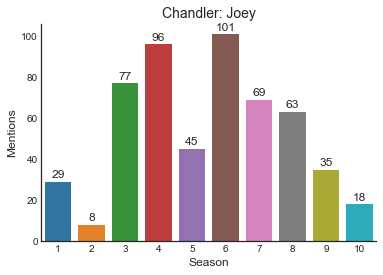

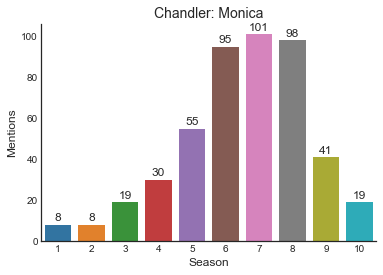

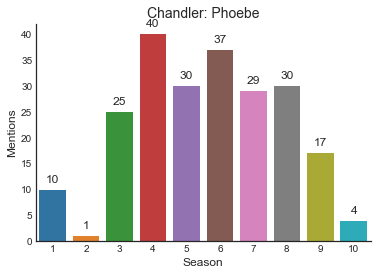

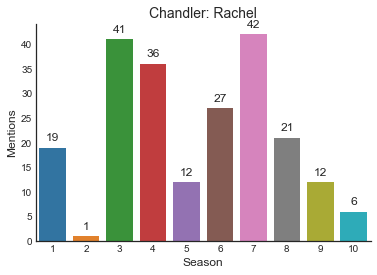

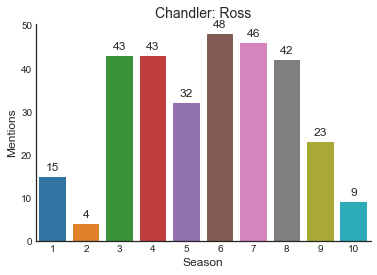

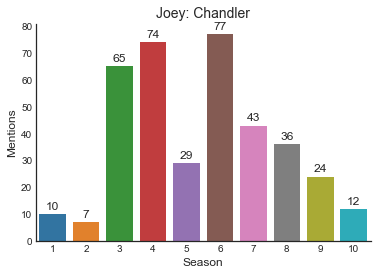

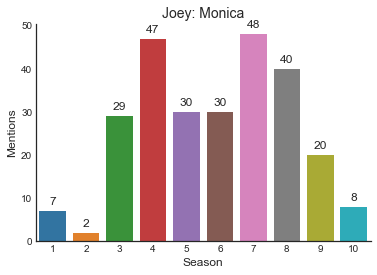

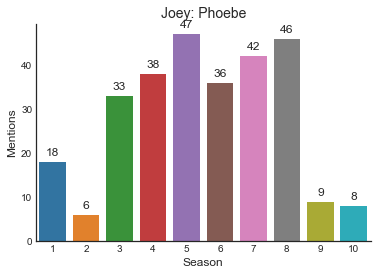

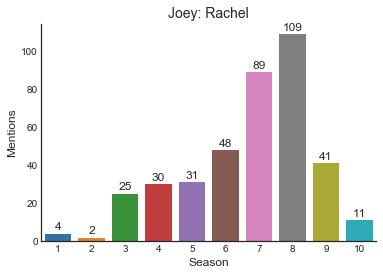

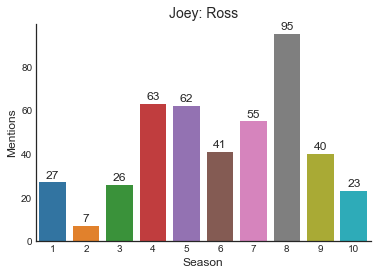

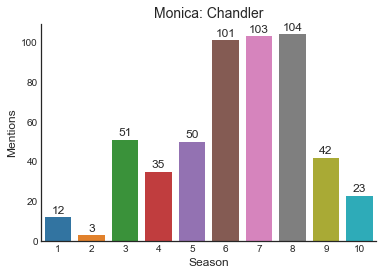

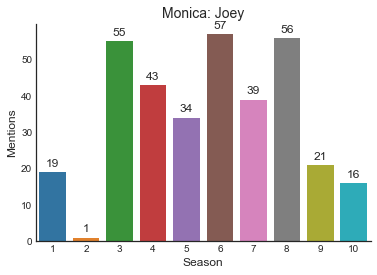

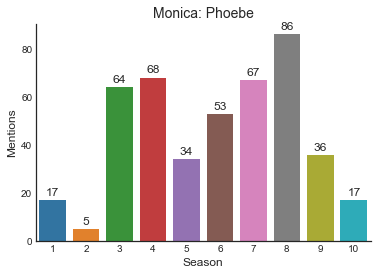

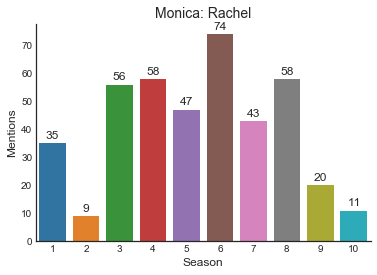

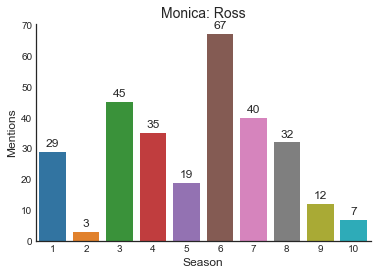

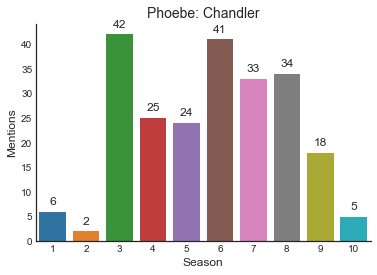

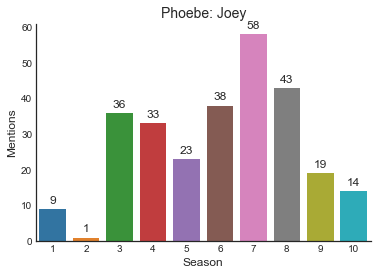

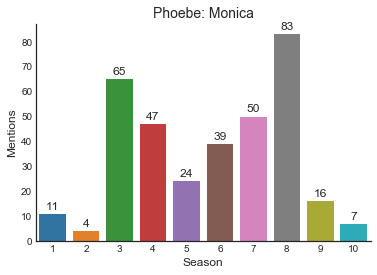

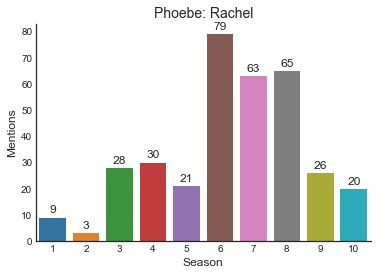

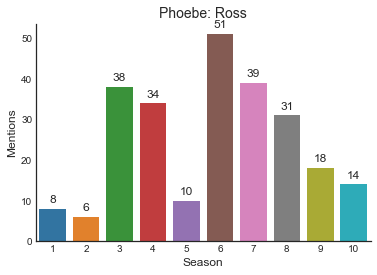

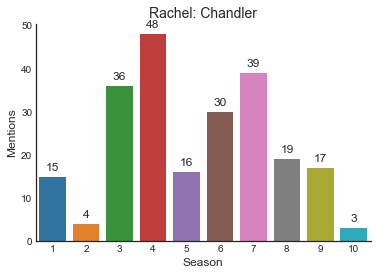

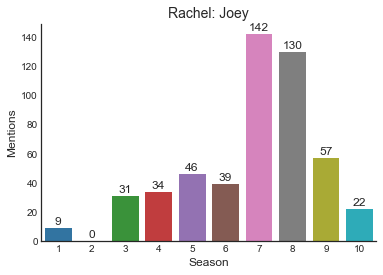

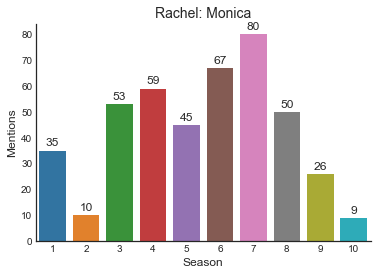

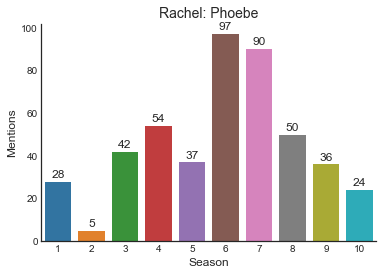

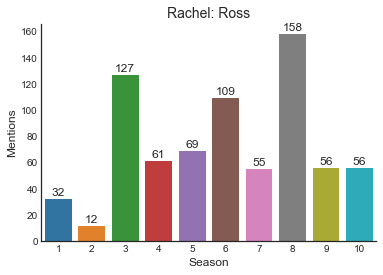

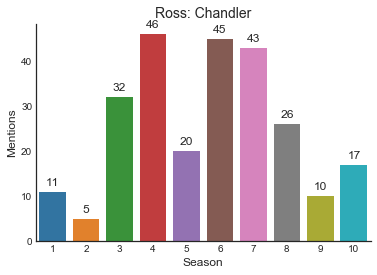

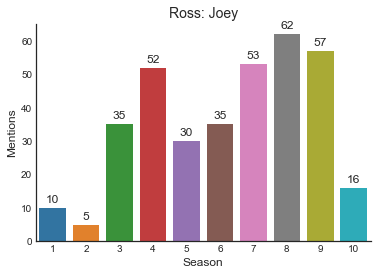

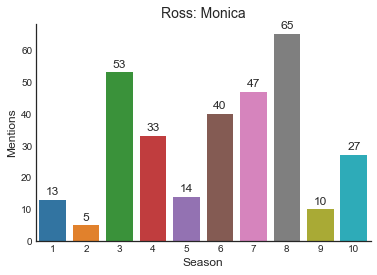

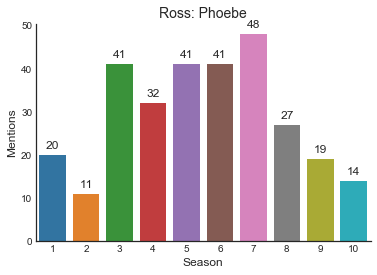

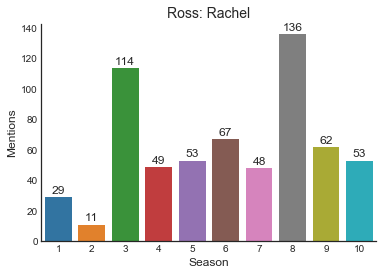

In [33]:
for speakerName in characters:
    for mentionedName in characters:
        if speakerName == mentionedName:
            continue
        else:
            get_plot(speakerName, mentionedName)

In [38]:
data = friends_mentions.loc[(friends_mentions['speakerName']==speakerName)&(friends_mentions['mentionedName']==mentionedName)]

In [40]:
list(data.mentions)

[]

In [36]:
#plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [41]:
friends_mentions.groupby('mentionedName').mentions.sum()

mentionedName
Chandler    1613
Joey        2021
Monica      1822
Phoebe      1710
Rachel      1984
Ross        2017
Name: mentions, dtype: int64

In [42]:
friends_mentions.groupby('speakerName').mentions.sum()

speakerName
Chandler    1760
Joey        1750
Monica      2012
Phoebe      1443
Rachel      2369
Ross        1833
Name: mentions, dtype: int64